In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Interpolação Ponderada no Tempo

In [59]:
def preencher_interp_ponderada(df):
    df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
    df.set_index('Data', inplace=True)
    df= df.replace(-1, np.nan)
    df = df.interpolate(method='time', limit_direction='backward', axis=0, order=2)
    df = df.reset_index()
    return df



In [60]:
def calcular_rmse(data1, data2):

        data = {'Valor_Real': data1,
        'Valor_Previsto': data2}
        df = pd.DataFrame(data)
        df['Diferenca'] = df['Valor_Real'] - df['Valor_Previsto']
        df['Diferenca_Quadrada'] = df['Diferenca'] ** 2
        mse = df['Diferenca_Quadrada'].mean()
        rmse = np.sqrt(mse)
        return rmse


#### Plotar gráficos de rmse

In [81]:
def plotar_grafico_colunas(rmse_values, nome):
    labels = ['Interp. Linear', 'Interp. Ponderada no Tempo', 'KNN', 'Média Móvel', 'Mediana Móvel']
    label_font_size = 6
    colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    # colors = ['#ce593d', '#af5941', '#5aa5a9', '#07375b', '#5c5034']
    plt.bar(labels, rmse_values, color=colors)
    plt.xticks(fontsize=label_font_size)
        
    plt.xlabel('Métodos')
    plt.ylabel('RMSE')
    plt.title('Valores RMSE ' +  nome)


#### Plotar gráficos de acurácia

In [ ]:
def plotar_grafico_colunas(rmse_values, nome):
    labels = ['Interp. Linear', 'Interp. Ponderada no Tempo', 'KNN', 'Média Móvel', 'Mediana Móvel']
    label_font_size = 6
    colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    # colors = ['#ce593d', '#af5941', '#5aa5a9', '#07375b', '#5c5034']
    plt.bar(labels, rmse_values, color=colors)
    plt.xticks(fontsize=label_font_size)
        
    plt.xlabel('Métodos')
    plt.ylabel('Acurácia')
    plt.title('Valores Acurácia ' +  nome)


#### Interpolação Ponderada no Tempo

Realize a interpolação ponderada no tempo das amostras contínuas com dados faltantes de bbr pa-ba, pr-am, mg-rs e ucbic pa-ba, pr-am, mg-rs. 


In [82]:


##só mudar o nome da rota (pa-ba, mg-rs e pr-am) e o protocolo (bbr e cubic)
df_original_mg_rs = pd.read_csv('../../datasets/processados/amostras_com_dados_faltantes/vazao/bbr/06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval.csv')
df_mg_rs = df_original_mg_rs.copy()
df_mg_rs = preencher_interp_ponderada(df_mg_rs)
caminho = '../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/mg-rs/'
nome  = "interp ponderada.csv"
df_mg_rs.to_csv( caminho + nome , index=False)

calcular_rmse(df_original_mg_rs["Vazao"], df_mg_rs["Vazao"])

df_original_pa_ba = pd.read_csv('../../datasets/processados/amostras_com_dados_faltantes/vazao/bbr/06-10-2023/tratado bbr esmond data pa-ba 06-10-2023_longest_interval.csv')
df_pa_ba = df_original_pa_ba.copy()
df_pa_ba = preencher_interp_ponderada(df_pa_ba)
caminho = '../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/pa-ba/'
nome  = "interp ponderada.csv"
df_pa_ba.to_csv( caminho + nome , index=False)

calcular_rmse(df_original_pa_ba["Vazao"], df_pa_ba["Vazao"])

df_original_pr_am = pd.read_csv('../../datasets/processados/amostras_com_dados_faltantes/vazao/bbr/06-10-2023/tratado bbr esmond data pr-am 06-10-2023_longest_interval.csv')
df_pr_am = df_original_pr_am.copy()
df_pr_am = preencher_interp_ponderada(df_pr_am)
caminho = '../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/pr-am/'
nome  = "interp ponderada.csv"
df_pr_am.to_csv( caminho + nome , index=False)

calcular_rmse(df_original_pr_am["Vazao"], df_pr_am["Vazao"])

#cubic

df_original_mg_rs_cubic = pd.read_csv('../../datasets/processados/amostras_com_dados_faltantes/vazao/cubic/06-10-2023/tratado cubic esmond data mg-rs 06-10-2023_longest_interval.csv')
df_mg_rs_cubic = df_original_mg_rs_cubic.copy()
df_mg_rs_cubic = preencher_interp_ponderada(df_mg_rs_cubic)
caminho = '../../datasets/processados/amostras_imputadas/vazao/cubic/06-10-2023/mg-rs/'
nome  = "interp ponderada.csv"
df_mg_rs_cubic.to_csv( caminho + nome , index=False)

calcular_rmse(df_original_mg_rs_cubic["Vazao"], df_mg_rs_cubic["Vazao"])

df_original_pa_ba_cubic = pd.read_csv('../../datasets/processados/amostras_com_dados_faltantes/vazao/cubic/06-10-2023/tratado cubic esmond data pa-ba 06-10-2023_longest_interval.csv')
df_pa_ba_cubic = df_original_pa_ba_cubic.copy()
df_pa_ba_cubic = preencher_interp_ponderada(df_pa_ba_cubic)
caminho = '../../datasets/processados/amostras_imputadas/vazao/cubic/06-10-2023/pa-ba/'
nome  = "interp ponderada.csv"
df_pa_ba_cubic.to_csv( caminho + nome , index=False)

calcular_rmse(df_original_pa_ba_cubic["Vazao"], df_pa_ba_cubic["Vazao"])

df_original_pr_am_cubic = pd.read_csv('../../datasets/processados/amostras_com_dados_faltantes/vazao/cubic/06-10-2023/tratado cubic esmond data pr-am 06-10-2023_longest_interval.csv')
df_pr_am_cubic = df_original_pr_am_cubic.copy()
df_pr_am_cubic = preencher_interp_ponderada(df_pr_am_cubic)
caminho = '../../datasets/processados/amostras_imputadas/vazao/cubic/06-10-2023/pr-am/'
nome  = "interp ponderada.csv"
df_pr_am_cubic.to_csv( caminho + nome , index=False)

calcular_rmse(df_original_pr_am_cubic["Vazao"], df_pr_am_cubic["Vazao"])



354344734.8598919

#### Calcular os rmse de todos os métodos de imputação para cada rota e plotar seus gráficos

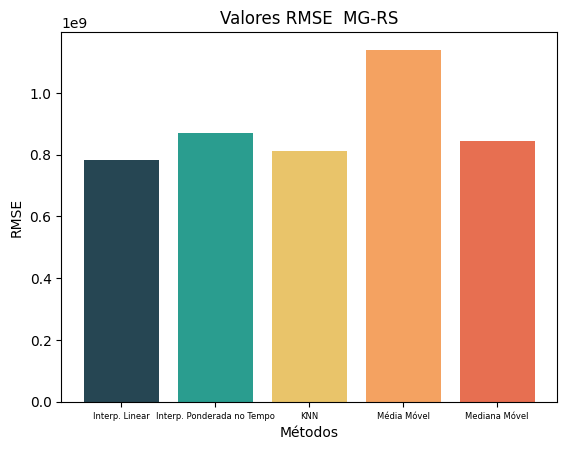

In [83]:
todos_rmse = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/bbr/06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/mg-rs"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = calcular_rmse(data1, data2)
    todos_rmse[arquivo] = rmse_arq

rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = " MG-RS"
plotar_grafico_colunas(rmse_values, nome)



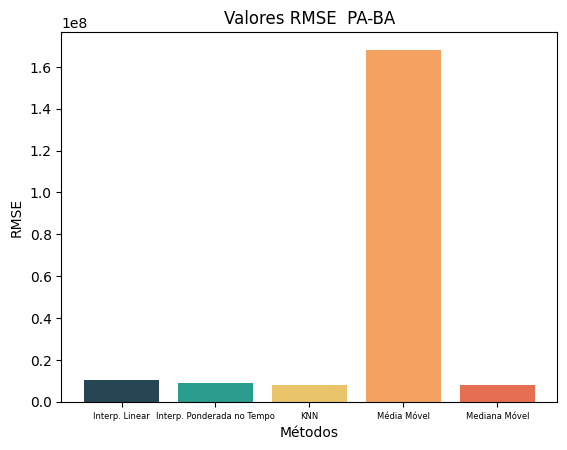

In [84]:
todos_rmse = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/bbr/06-10-2023/tratado bbr esmond data pa-ba 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/pa-ba"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = calcular_rmse(data1, data2)
    todos_rmse[arquivo] = rmse_arq

todos_rmse
rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = " PA-BA"
plotar_grafico_colunas(rmse_values, nome)

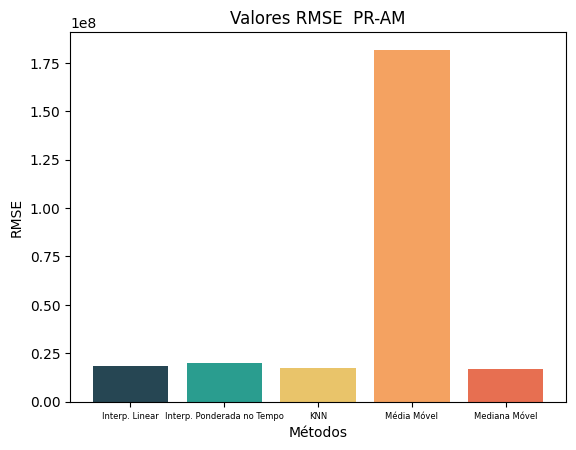

In [85]:
todos_rmse = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/bbr/06-10-2023/tratado bbr esmond data pr-am 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/pr-am"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = calcular_rmse(data1, data2)
    todos_rmse[arquivo] = rmse_arq

todos_rmse
rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = " PR-AM"
plotar_grafico_colunas(rmse_values, nome)

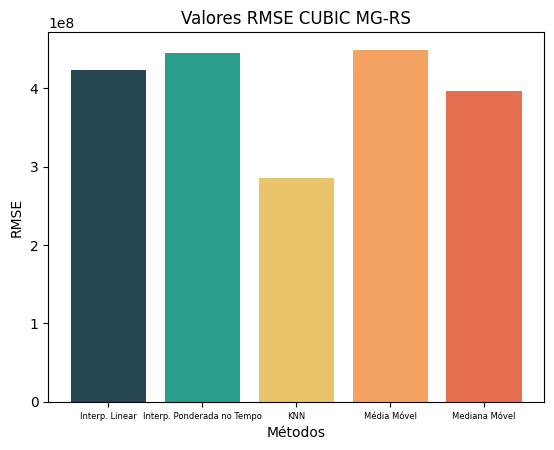

In [86]:
todos_rmse = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/cubic/06-10-2023/tratado cubic esmond data mg-rs 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/processados/amostras_imputadas/vazao/cubic/06-10-2023/mg-rs"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = calcular_rmse(data1, data2)
    todos_rmse[arquivo] = rmse_arq

rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = "CUBIC MG-RS"
plotar_grafico_colunas(rmse_values, nome)



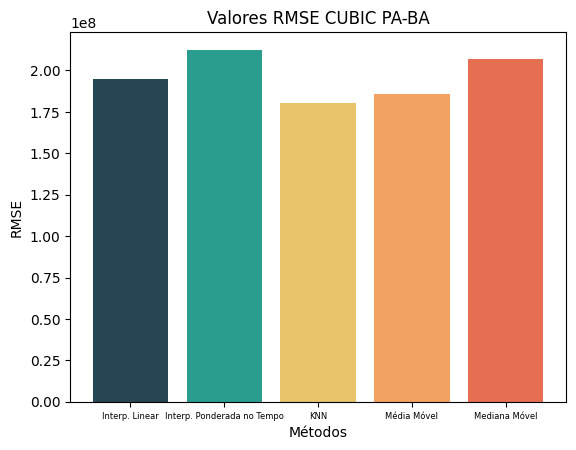

In [87]:
todos_rmse = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/cubic/06-10-2023/tratado cubic esmond data pa-ba 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/processados/amostras_imputadas/vazao/cubic/06-10-2023/pa-ba"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = calcular_rmse(data1, data2)
    todos_rmse[arquivo] = rmse_arq

todos_rmse
rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = "CUBIC PA-BA"
plotar_grafico_colunas(rmse_values, nome)

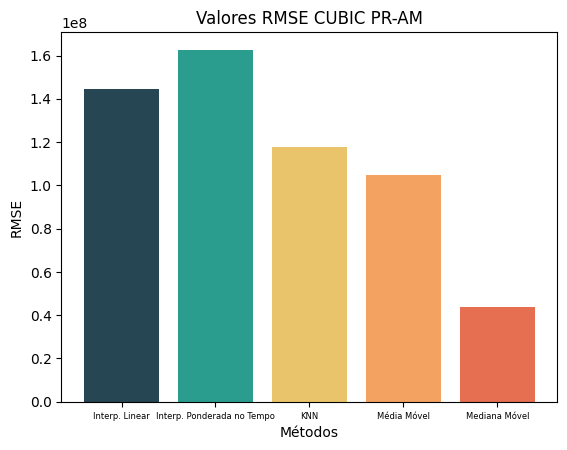

In [88]:
todos_rmse = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/cubic/06-10-2023/tratado cubic esmond data pr-am 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/processados/amostras_imputadas/vazao/cubic/06-10-2023/pr-am"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = calcular_rmse(data1, data2)
    todos_rmse[arquivo] = rmse_arq

todos_rmse
rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = "CUBIC PR-AM"
plotar_grafico_colunas(rmse_values, nome)

#### Calcular os rmse de todos os métodos de imputação para cada rota e plotar seus gráficos

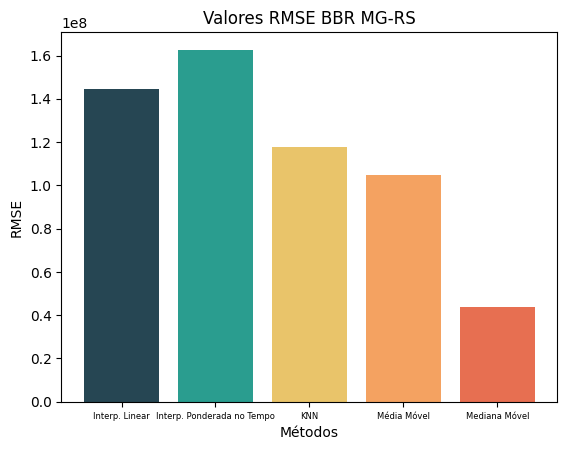

In [89]:
rmse_values = [todos_rmse[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = "BBR MG-RS"
plotar_grafico_colunas(rmse_values, nome)

In [90]:
import os
import numpy as np
#bbr
pasta_dados_completos = "../../datasets/intervalos-completos/vazao/cubic 06-10-2023"
pasta_dados_preenchidos = "../../datasets/intervalos-completos/vazao/dados-preenchidos/cubic 06-10-2023"

def gerar_porcentagem(array):
    cont = array.count('1')
    porcentagem = (cont/len(array)) * 100
    return porcentagem

def substituir_valor(valor):
    if valor < 200000000:
        return "r"
    elif 200000000 <= valor < 500000000:
        return "o"
    elif 500000000 <= valor < 800000000:
        return "y"
    elif 800000000 <= valor < 1000000000:
        return "b"
    else:
        return "g"

def criar_faixas(preenchido, completo):
    df_preenchido = pd.read_csv(preenchido)
    df_completo = pd.read_csv(completo)
    df_comparativo = pd.DataFrame()
    df_comparativo["Vazao Completa"] = df_completo["Vazao"]
    df_comparativo["Vazao Preenchida"] = df_preenchido["Vazao"]
    df_comparativo["Vazao Faixa"] = 0
    df_comparativo['Vazao Completa'] = df_comparativo['Vazao Completa'].apply(substituir_valor)
    df_comparativo['Vazao Preenchida'] = df_comparativo['Vazao Preenchida'].apply(substituir_valor)
    df_comparativo['Vazao Faixa'] = df_comparativo.apply(lambda row: 1 if row['Vazao Completa'] == row['Vazao Preenchida'] else 0, axis=1)
    cont = (df_comparativo['Vazao Faixa'] == 1).sum()
    porcentagem = (cont/len(df_comparativo)) * 100
    return porcentagem
    

def gerar_faixas(completos_pasta, preenchidos_pasta):
    # if "bbr" in caminho: tipo = "bbr"
    # elif "cubic" in caminho: tipo = "cubic"
    for pasta in os.listdir(completos_pasta):
        if "ce-sp" in pasta: nome = "ce-sp"
        if "mg-rs" in pasta: nome = "mg-rs"
        if "pa-ba" in pasta: nome = "pa-ba"
        if "pr-am" in pasta: nome = "pr-am"
        if "df-rj" in pasta: nome = "df-rj"
        caminho_completo = os.path.join(completos_pasta, pasta)
        caminho = os.path.join(preenchidos_pasta, nome)
        dic = {}
        #resultado_df = pd.DataFrame()
        for arquivo in os.listdir(caminho):
            caminho_arquivo = os.path.join(caminho, arquivo)
            #df = pd.DataFrame()
            p = criar_faixas(caminho_arquivo, caminho_completo)
            if nome in dic: dic[nome].append(p)
            else: dic[nome] = [p]
            #nome_coluna = f"Vazao Faixa: {arquivo}"
            #resultado_df[nome_coluna] = df["Vazao Faixa"]
        #resultado_df.to_csv("../" + nome +".csv", index=False)
        print(dic)

gerar_faixas(pasta_dados_completos, pasta_dados_preenchidos)



FileNotFoundError: [Errno 2] No such file or directory: '../../datasets/intervalos-completos/vazao/cubic 06-10-2023'

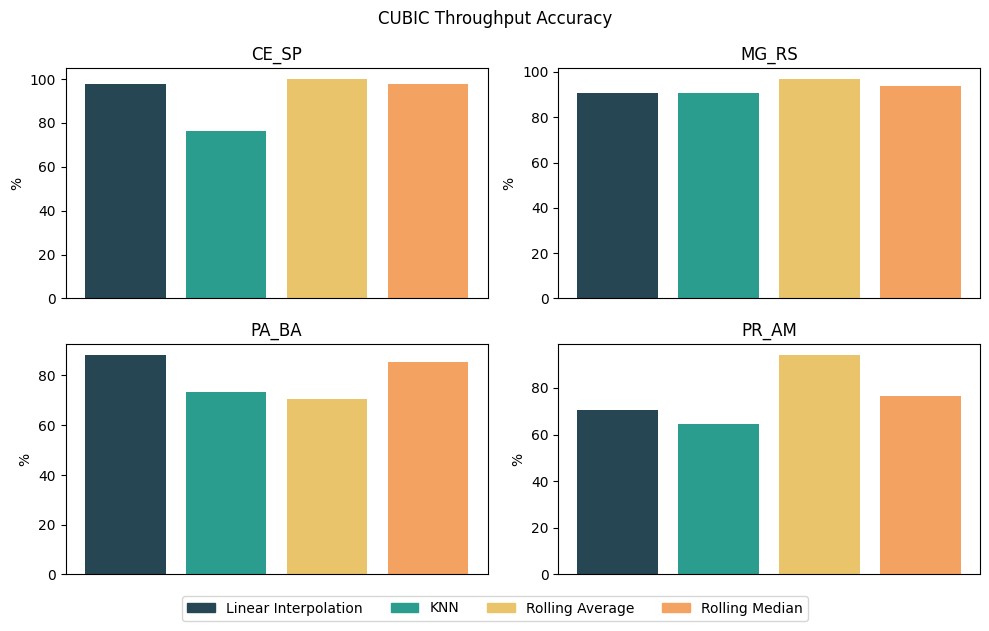

In [ ]:
import matplotlib.pyplot as plt

todos_rsmes = {
'pa-ba': [88.23529411764706, 73.52941176470588, 70.58823529411765, 85.29411764705883],
'mg-rs': [90.625, 90.625, 96.875, 93.75],
'pr-am': [70.58823529411765, 64.70588235294117, 94.11764705882352, 76.47058823529412],
'ce-sp': [97.82608695652173, 76.08695652173914, 100.0, 97.82608695652173]
}

# Seus dados para os gráficos de colunas
dados1 = todos_rsmes.get('ce-sp', [])
dados2 = todos_rsmes.get('mg-rs', [])
dados3 = todos_rsmes.get('pa-ba', [])
dados4 = todos_rsmes.get('pr-am', [])

# Defina as cores personalizadas
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Plote o primeiro gráfico de colunas no primeiro subplot
ax1.bar(range(len(dados1)), dados1, color=colors)
ax1.set_title('CE_SP')
ax1.set_ylabel('%')
ax1.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Plote o segundo gráfico de colunas no segundo subplot
ax2.bar(range(len(dados2)), dados2, color=colors)
ax2.set_title('MG_RS')
ax2.set_ylabel('%')
ax2.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Plote o terceiro gráfico de colunas no terceiro subplot
ax3.bar(range(len(dados3)), dados3, color=colors)
ax3.set_title('PA_BA')
ax3.set_ylabel('%')
ax3.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Plote o quarto gráfico de colunas no quarto subplot
ax4.bar(range(len(dados4)), dados4, color=colors)
ax4.set_title('PR_AM')
ax4.set_ylabel('%')
ax4.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Configure a posição e estilo das legendas
fig.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colors],labels=['Linear Interpolation', 'KNN', 'Rolling Average', 'Rolling Median'],loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))  # Ajuste o valor de y aqui

# Adicione um título à figura inteira
plt.suptitle('CUBIC Throughput Accuracy')

# Ajuste o espaço entre os subplots para evitar sobreposições
plt.tight_layout()

# Exiba a figura
plt.show()
